In [23]:
%matplotlib inline
import numpy as np
import pandas as pd
import sys
import math
import io
from pprint import pprint
import os
from sklearn import preprocessing
from datetime import datetime, timedelta
from typing import List
import itertools
from datetime import datetime
import itertools
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,r2_score

In [5]:
def parse(path: str) -> pd.DataFrame:
    # CSVから読み取る
    try:
        df = pd.read_csv(path,  delimiter='\t', header=None, names=[ 'c{0:02d}'.format(i) for i in range(10) ])
    except Exception as e:
        raise(e)
    df_target = df.to_numpy()

    # いい感じに整形
    requests = pd.DataFrame([{"date": datetime.fromtimestamp(float(d[4])/1000), "status": d[6], "count": 1} for d in df_target if (d[0] == "REQUEST" and not math.isnan(float(d[4])) )])
    if len(requests) == 0:
        return pd.DataFrame([])

    # 1秒ごとにサマる
    grouped1 = requests.groupby([pd.Grouper(key=("status")),pd.Grouper(key=("date"), freq="S")]).sum().reset_index()

    # 全部同じ数は困るので乱数を入れておく
    for x in range(len(grouped1)):
        grouped1.iat[x, 2] += np.random.rand() * sys.float_info.epsilon

    return grouped1

In [6]:
def reg_tree() -> DecisionTreeRegressor:
    X = [
        [60],
        [100],
        [140],
        [175],
        [210],
        [255],
        [300],
        [330],
        [360],
        [390],
        [420],
        [460],
        [500],
        [540],
        [580],
        [610],
        [640],
        [670],
        [700],
        [730],
        [760],
        [790],
        [820],
        [850],
        [880],
        [910],
        [940],
        [970],
        [1000],
        [1030],
        [1060],
    ]

    y = [
        4,
        5,
        6,
        7,
        8,
        9,
        10,
        11,
        12,
        13,
        14,
        15,
        16,
        17,
        18,
        19,
        20,
        21,
        22,
        23,
        24,
        25,
        26,
        27,
        28,
        29,
        30,
        31,
        32,
        33,
        34,
    ]

    return DecisionTreeRegressor().fit(X, y)

In [15]:
fuzzy_cluster_size_01 = pd.read_csv("../fuzzy20230405/hpq_20230502133237.log", names=["date", "size"])
fuzzy_cluster_size_01["date"] = pd.to_datetime(fuzzy_cluster_size_01["date"], utc = False) + pd.to_timedelta(9, unit='h')
fuzzy_cluster_size_01

,date,size
0,2023-05-02 22:32:38+00:00,16
1,2023-05-02 22:32:39+00:00,16
2,2023-05-02 22:32:40+00:00,16
3,2023-05-02 22:32:41+00:00,16
4,2023-05-02 22:32:42+00:00,16
...,...,...
1159,2023-05-02 22:54:11+00:00,6
1160,2023-05-02 22:54:12+00:00,6
1161,2023-05-02 22:54:13+00:00,6
1162,2023-05-02 22:54:15+00:00,6


In [7]:
fuzzy_request_01 = parse("../fuzzy20230405/worldcap+simulation.log")
fuzzy_request_02 = fuzzy_request_01[fuzzy_request_01["status"] != "KO"]
fuzzy_request_02["date"] = pd.to_datetime(fuzzy_request_02["date"], utc=True)
fuzzy_request_02

/var/folders/zk/cf948rq56631k5dgzn62fkjm0000gn/T/ipykernel_40503/600845077.py:4: DtypeWarning: Columns (2,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path,  delimiter='\t', header=None, names=[ 'c{0:02d}'.format(i) for i in range(10) ])
/var/folders/zk/cf948rq56631k5dgzn62fkjm0000gn/T/ipykernel_40503/3588161657.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fuzzy_request_02["date"] = pd.to_datetime(fuzzy_request_02["date"], utc=True)


,status,date,count
5,OK,2023-05-02 22:32:55+00:00,47
6,OK,2023-05-02 22:32:56+00:00,126
7,OK,2023-05-02 22:32:57+00:00,116
8,OK,2023-05-02 22:32:58+00:00,126
9,OK,2023-05-02 22:32:59+00:00,114
...,...,...,...
1261,OK,2023-05-02 22:53:51+00:00,138
1262,OK,2023-05-02 22:53:52+00:00,127
1263,OK,2023-05-02 22:53:53+00:00,153
1264,OK,2023-05-02 22:53:54+00:00,141


In [16]:
fuzzy_merged_01 = pd.merge(fuzzy_cluster_size_01, fuzzy_request_02, left_on="date", right_on="date")
fuzzy_merged_01

,date,size,status,count
0,2023-05-02 22:32:55+00:00,16,OK,47
1,2023-05-02 22:32:56+00:00,16,OK,126
2,2023-05-02 22:32:57+00:00,16,OK,116
3,2023-05-02 22:32:58+00:00,16,OK,126
4,2023-05-02 22:32:59+00:00,16,OK,114
...,...,...,...,...
1127,2023-05-02 22:53:51+00:00,6,OK,138
1128,2023-05-02 22:53:52+00:00,6,OK,127
1129,2023-05-02 22:53:53+00:00,6,OK,153
1130,2023-05-02 22:53:54+00:00,6,OK,141


In [21]:
fuzzy_merged_02 = fuzzy_merged_01
fuzzy_merged_02["expected_size"] = fuzzy_merged_01["count"].map(lambda x: reg_tree().predict([[x]])[0])
fuzzy_merged_02["diff"] = abs(fuzzy_merged_02["size"] - fuzzy_merged_02["expected_size"])
fuzzy_merged_02


,date,size,status,count,expected_size,diff
0,2023-05-02 22:32:55+00:00,16,OK,47,4.0,12.0
1,2023-05-02 22:32:56+00:00,16,OK,126,6.0,10.0
2,2023-05-02 22:32:57+00:00,16,OK,116,5.0,11.0
3,2023-05-02 22:32:58+00:00,16,OK,126,6.0,10.0
4,2023-05-02 22:32:59+00:00,16,OK,114,5.0,11.0
...,...,...,...,...,...,...
1127,2023-05-02 22:53:51+00:00,6,OK,138,6.0,0.0
1128,2023-05-02 22:53:52+00:00,6,OK,127,6.0,0.0
1129,2023-05-02 22:53:53+00:00,6,OK,153,6.0,0.0
1130,2023-05-02 22:53:54+00:00,6,OK,141,6.0,0.0


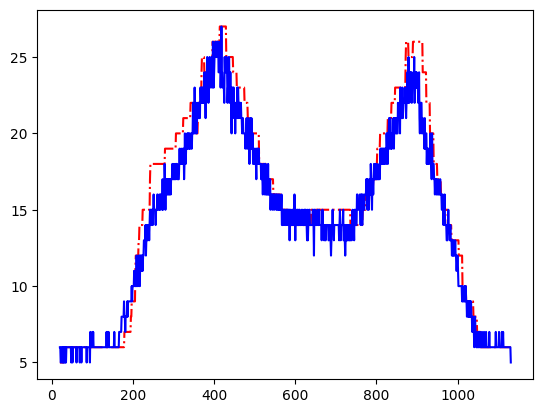

In [22]:
plt.plot([k for k, v in enumerate(fuzzy_merged_02["date"])][20:], fuzzy_merged_02["size"][20:], color="red", linestyle='dashdot', label='actual size')
plt.plot([k for k, v in enumerate(fuzzy_merged_02["date"])][20:], fuzzy_merged_02["expected_size"][20:], color="blue", label='expected size')

In [24]:
mean_squared_error(fuzzy_merged_02["size"], fuzzy_merged_02["expected_size"])

3.820671378091873

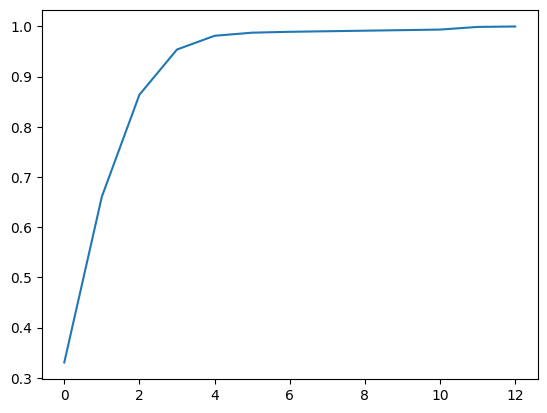

In [31]:
fuzzy_pmf = fuzzy_merged_02['diff'].value_counts(normalize=True).sort_index()
fuzzy_cdf = np.cumsum(fuzzy_pmf)
plt.plot(fuzzy_cdf)

In [8]:
std_cluster_size_01 = pd.read_csv("hpq_20221111151430.log", names=["date", "size"])
std_cluster_size_01

,date,size
0,2022-11-11T15:14:49+00:00,6
1,2022-11-11T15:14:50+00:00,6
2,2022-11-11T15:14:51+00:00,6
3,2022-11-11T15:14:52+00:00,6
4,2022-11-11T15:14:54+00:00,6
...,...,...
1110,2022-11-11T15:35:44+00:00,6
1111,2022-11-11T15:35:45+00:00,6
1112,2022-11-11T15:35:46+00:00,6
1113,2022-11-11T15:35:47+00:00,6


In [25]:
std_cluster_size_02 = std_cluster_size_01
std_cluster_size_02["date"] = pd.to_datetime(std_cluster_size_02["date"], utc = False) + pd.to_timedelta(9, unit='h')
std_cluster_size_02

,date,size
0,2022-11-12 00:14:49+00:00,6
1,2022-11-12 00:14:50+00:00,6
2,2022-11-12 00:14:51+00:00,6
3,2022-11-12 00:14:52+00:00,6
4,2022-11-12 00:14:54+00:00,6
...,...,...
1110,2022-11-12 00:35:44+00:00,6
1111,2022-11-12 00:35:45+00:00,6
1112,2022-11-12 00:35:46+00:00,6
1113,2022-11-12 00:35:47+00:00,6


In [9]:
std_request_01 = parse("simulation_ba2.log")
std_request_02 = std_request_01[std_request_01["status"] != "KO"]
std_request_02["date"] = pd.to_datetime(std_request_02["date"], utc=True)
std_request_02

/var/folders/zk/cf948rq56631k5dgzn62fkjm0000gn/T/ipykernel_40503/600845077.py:4: DtypeWarning: Columns (2,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path,  delimiter='\t', header=None, names=[ 'c{0:02d}'.format(i) for i in range(10) ])
/var/folders/zk/cf948rq56631k5dgzn62fkjm0000gn/T/ipykernel_40503/3658772405.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  std_request_02["date"] = pd.to_datetime(std_request_02["date"], utc=True)


,status,date,count
34,OK,2022-11-12 00:14:47+00:00,37
35,OK,2022-11-12 00:14:48+00:00,115
36,OK,2022-11-12 00:14:49+00:00,120
37,OK,2022-11-12 00:14:50+00:00,103
38,OK,2022-11-12 00:14:51+00:00,117
...,...,...,...
1290,OK,2022-11-12 00:35:43+00:00,143
1291,OK,2022-11-12 00:35:44+00:00,136
1292,OK,2022-11-12 00:35:45+00:00,130
1293,OK,2022-11-12 00:35:46+00:00,126


In [26]:
std_merged_01 = pd.merge(std_cluster_size_02, std_request_02, left_on="date", right_on="date")
std_merged_02 = std_merged_01
std_merged_02["expected_size"] = std_merged_01["count"].map(lambda x: reg_tree().predict([[x]])[0])
std_merged_02["diff"] = abs(std_merged_02["size"] - std_merged_02["expected_size"])
std_merged_02


,date,size,status,count,expected_size,diff
0,2022-11-12 00:14:49+00:00,6,OK,120,5.0,1.0
1,2022-11-12 00:14:50+00:00,6,OK,103,5.0,1.0
2,2022-11-12 00:14:51+00:00,6,OK,117,5.0,1.0
3,2022-11-12 00:14:52+00:00,6,OK,127,6.0,0.0
4,2022-11-12 00:14:54+00:00,6,OK,104,5.0,1.0
...,...,...,...,...,...,...
1109,2022-11-12 00:35:43+00:00,6,OK,143,6.0,0.0
1110,2022-11-12 00:35:44+00:00,6,OK,136,6.0,0.0
1111,2022-11-12 00:35:45+00:00,6,OK,130,6.0,0.0
1112,2022-11-12 00:35:46+00:00,6,OK,126,6.0,0.0


In [27]:
mean_squared_error(std_merged_02["size"], std_merged_02["expected_size"])


26.550269299820467

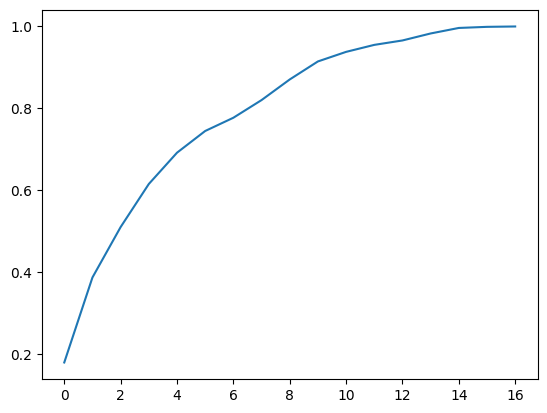

In [30]:
std_pmf = std_merged_02['diff'].value_counts(normalize=True).sort_index()
std_cdf = np.cumsum(std_pmf)
plt.plot(std_cdf)

In [4]:
sampen_cluster_size_01 = pd.read_csv("hpq_20221111144334.log", names=["date", "size"])
sampen_cluster_size_01

,date,size
0,2022-11-11T14:43:51+00:00,6
1,2022-11-11T14:43:52+00:00,6
2,2022-11-11T14:43:54+00:00,6
3,2022-11-11T14:43:55+00:00,6
4,2022-11-11T14:43:56+00:00,6
...,...,...
1108,2022-11-11T15:04:46+00:00,6
1109,2022-11-11T15:04:47+00:00,6
1110,2022-11-11T15:04:48+00:00,6
1111,2022-11-11T15:04:50+00:00,6


In [32]:
sampen_cluster_size_02 = sampen_cluster_size_01
sampen_cluster_size_02["date"] = pd.to_datetime(sampen_cluster_size_02["date"], utc = False) + pd.to_timedelta(9, unit='h')
sampen_cluster_size_02

,date,size
0,2022-11-11 23:43:51+00:00,6
1,2022-11-11 23:43:52+00:00,6
2,2022-11-11 23:43:54+00:00,6
3,2022-11-11 23:43:55+00:00,6
4,2022-11-11 23:43:56+00:00,6
...,...,...
1108,2022-11-12 00:04:46+00:00,6
1109,2022-11-12 00:04:47+00:00,6
1110,2022-11-12 00:04:48+00:00,6
1111,2022-11-12 00:04:50+00:00,6


In [10]:
sampen_request_01 = parse("simulation_bse.log")
sampen_request_02 = sampen_request_01[sampen_request_01["status"] != "KO"]
sampen_request_02["date"] = pd.to_datetime(sampen_request_02["date"], utc=True)
sampen_request_02

/var/folders/zk/cf948rq56631k5dgzn62fkjm0000gn/T/ipykernel_40503/600845077.py:4: DtypeWarning: Columns (2,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path,  delimiter='\t', header=None, names=[ 'c{0:02d}'.format(i) for i in range(10) ])
/var/folders/zk/cf948rq56631k5dgzn62fkjm0000gn/T/ipykernel_40503/1770829219.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampen_request_02["date"] = pd.to_datetime(sampen_request_02["date"], utc=True)


,status,date,count
45,OK,2022-11-11 23:43:50+00:00,114.0
46,OK,2022-11-11 23:43:51+00:00,144.0
47,OK,2022-11-11 23:43:52+00:00,143.0
48,OK,2022-11-11 23:43:53+00:00,124.0
49,OK,2022-11-11 23:43:54+00:00,111.0
...,...,...,...
1301,OK,2022-11-12 00:04:46+00:00,143.0
1302,OK,2022-11-12 00:04:47+00:00,125.0
1303,OK,2022-11-12 00:04:48+00:00,126.0
1304,OK,2022-11-12 00:04:49+00:00,151.0


In [33]:
sampen_merged_01 = pd.merge(sampen_cluster_size_02, sampen_request_02, left_on="date", right_on="date")
sampen_merged_02 = sampen_merged_01
sampen_merged_02["expected_size"] = sampen_merged_01["count"].map(lambda x: reg_tree().predict([[x]])[0])
sampen_merged_02["diff"] = abs(sampen_merged_02["size"] - sampen_merged_02["expected_size"])
sampen_merged_02


,date,size,status,count,expected_size,diff
0,2022-11-11 23:43:51+00:00,6,OK,144.0,6.0,0.0
1,2022-11-11 23:43:52+00:00,6,OK,143.0,6.0,0.0
2,2022-11-11 23:43:54+00:00,6,OK,111.0,5.0,1.0
3,2022-11-11 23:43:55+00:00,6,OK,111.0,5.0,1.0
4,2022-11-11 23:43:56+00:00,6,OK,120.0,5.0,1.0
...,...,...,...,...,...,...
1107,2022-11-12 00:04:45+00:00,6,OK,133.0,6.0,0.0
1108,2022-11-12 00:04:46+00:00,6,OK,143.0,6.0,0.0
1109,2022-11-12 00:04:47+00:00,6,OK,125.0,6.0,0.0
1110,2022-11-12 00:04:48+00:00,6,OK,126.0,6.0,0.0


In [34]:
mean_squared_error(sampen_merged_02["size"], sampen_merged_02["expected_size"])


20.18525179856115

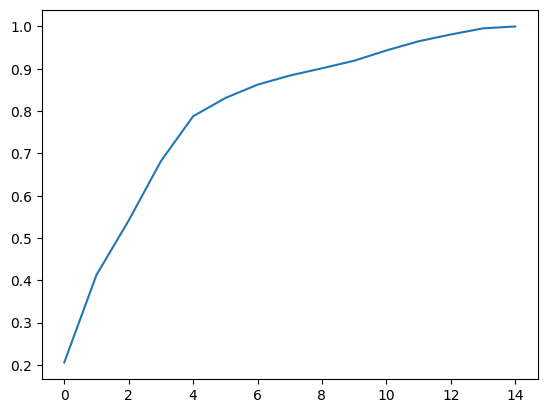

In [35]:
sampen_pmf = sampen_merged_02['diff'].value_counts(normalize=True).sort_index()
sampen_cdf = np.cumsum(sampen_pmf)
plt.plot(sampen_cdf)

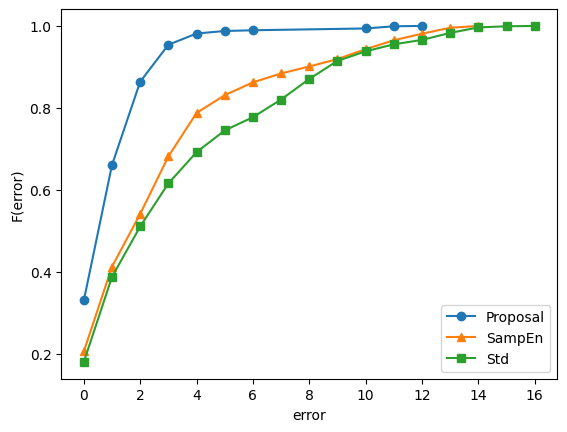

In [40]:
plt.xlabel(xlabel="error")
plt.ylabel(ylabel="F(error)")

plt.plot(fuzzy_cdf, "o-", label='Proposal')
plt.plot(sampen_cdf, "^-", label='SampEn')
plt.plot(std_cdf, "s-", label='Std')

plt.legend()